In [49]:
# Dependdencies and set up 

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as st
import seaborn as sns

In [50]:
latest=pd.read_csv("CSVs/historical_RAPTOR_by_team.csv")
historical=pd.read_csv("CSVs/latest_RAPTOR_by_team.csv")

In [51]:
merged=pd.merge(latest,historical,how="outer")
merged.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,predator_offense,predator_defense,predator_total,pace_impact,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
0,Kareem Abdul-Jabbar,abdulka01,1977,PO,LAL,1020,467,6.350694,3.288313,9.639006,...,6.592019,3.065131,9.657150,-0.432080,NaN,NaN,NaN,NaN,NaN,NaN
1,Kareem Abdul-Jabbar,abdulka01,1977,RS,LAL,6654,3016,4.267101,3.075579,7.342679,...,4.482404,2.556956,7.039361,-0.513828,NaN,NaN,NaN,NaN,NaN,NaN
2,Zaid Abdul-Aziz,abdulza01,1977,RS,BUF,441,195,-1.926415,-0.368835,-2.295249,...,-1.817927,-1.624327,-3.442253,-0.751147,NaN,NaN,NaN,NaN,NaN,NaN
3,Tom Abernethy,abernto01,1977,PO,LAL,467,214,0.024715,-0.825643,-0.800928,...,-0.565843,-1.695077,-2.260920,-0.425337,NaN,NaN,NaN,NaN,NaN,NaN
4,Tom Abernethy,abernto01,1977,RS,LAL,3040,1378,0.517829,-0.459991,0.057838,...,0.141415,-0.835555,-0.694139,-0.315821,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
merged.fillna(0,inplace=True)
clean_df=merged
clean_df.isnull().sum()
clean_df.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,predator_offense,predator_defense,predator_total,pace_impact,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
0,Kareem Abdul-Jabbar,abdulka01,1977,PO,LAL,1020,467,6.350694,3.288313,9.639006,...,6.592019,3.065131,9.657150,-0.432080,0.0,0.0,0.0,0.0,0.0,0.0
1,Kareem Abdul-Jabbar,abdulka01,1977,RS,LAL,6654,3016,4.267101,3.075579,7.342679,...,4.482404,2.556956,7.039361,-0.513828,0.0,0.0,0.0,0.0,0.0,0.0
2,Zaid Abdul-Aziz,abdulza01,1977,RS,BUF,441,195,-1.926415,-0.368835,-2.295249,...,-1.817927,-1.624327,-3.442253,-0.751147,0.0,0.0,0.0,0.0,0.0,0.0
3,Tom Abernethy,abernto01,1977,PO,LAL,467,214,0.024715,-0.825643,-0.800928,...,-0.565843,-1.695077,-2.260920,-0.425337,0.0,0.0,0.0,0.0,0.0,0.0
4,Tom Abernethy,abernto01,1977,RS,LAL,3040,1378,0.517829,-0.459991,0.057838,...,0.141415,-0.835555,-0.694139,-0.315821,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
clean_df.columns

Index(['player_name', 'player_id', 'season', 'season_type', 'team', 'poss',
       'mp', 'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact',
       'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total'],
      dtype='object')

### Which players had the most minutes played and the greatest pace impact on their team compared to their RAPTOR scores?

In [58]:
# Filter columns

df=clean_df[["player_name","mp","raptor_total","pace_impact"]]
df.head(2)

# Get the totals of minutes played,pace impact and raptor totals of each player.

total_mp=df.groupby("player_name")["mp"].sum()
total_pace_impact=df.groupby("player_name")["pace_impact"].sum()
total_raptor=df.groupby("player_name")["raptor_total"].sum()

# Make it into a Dataframe

total_mp_pace_raptor = pd.DataFrame({"Total Minutes Played": total_mp,
                             "Total Pace Impact": total_pace_impact,
                             "Total RAPTOR Scores": total_raptor})
total_mp_pace_raptor=total_mp_pace_raptor.reset_index()

# Display the Dataframe

total_mp_pace_raptor.head(2)

,player_name,Total Minutes Played,Total Pace Impact,Total RAPTOR Scores
0,A.C. Green,40671,-14.631130,-5.311204
1,A.J. Bramlett,61,0.527413,-9.820485


In [56]:
# Averages of various features by teams.

total_players=clean_df.groupby("team")["player_name"].count()
raptor_total=clean_df.groupby("team")["raptor_total"].mean()
poss=clean_df.groupby("team")["poss"].mean()
war_total=clean_df.groupby("team")["war_total"].mean()
pace_impact=clean_df.groupby("team")["pace_impact"].mean()
raptor_onoff_total=clean_df.groupby("team")["raptor_onoff_total"].mean()
avg_mp_team=clean_df.groupby("team")["mp"].mean()
avg_raptor_offense=clean_df.groupby("team")["raptor_offense"].mean()
avg_raptor_defense=clean_df.groupby("team")["raptor_defense"].mean()

avg_summary = pd.DataFrame({"Total Players": total_players,
          "Raptor Total": raptor_total,
          "Possessions": poss,
          "War Total": war_total,
          "Pace Impact": pace_impact,
          "Minutes Played":avg_mp_team,
          "Raptor On and Off Totals":raptor_onoff_total,
          "RAPTOR Offense": avg_raptor_offense,
          "RAPTOR Defense": avg_raptor_defense}).reset_index()
avg_summary.head()

,team,Total Players,Raptor Total,Possessions,War Total,Pace Impact,Minutes Played,Raptor On and Off Totals,RAPTOR Offense,RAPTOR Defense
0,ATL,1185,-1.570031,1642.004219,1.140147,0.263341,819.489451,0.018678,-1.187607,-0.382423
1,BOS,1222,-1.199087,1704.759411,1.448069,0.248033,838.174304,0.033699,-1.130326,-0.068761
2,BRK,340,-1.191441,1366.402941,0.843397,0.275703,666.041176,-0.316375,-1.077620,-0.113821
3,BUF,37,-2.715885,2382.189189,0.983682,0.180248,1068.513514,0.000000,-1.835151,-0.880735
4,CHA,380,-2.366248,1938.507895,0.952573,0.133151,975.000000,-0.145483,-1.909040,-0.457208


In [8]:
# function for bar plot

def bar_plot(x_axis,y_axis,ylabel,title,size):
    fig, ax = plt.subplots(figsize=(size))
    bar_container= ax.bar(x_axis,y_axis,alpha=0.5,color="#F94C10")
    ax.bar_label(bar_container,fmt='{:,.0f}')
    plt.xlabel("Player Names",weight="bold")
    plt.ylabel(ylabel,weight="bold")
    plt.title(f"Top 10  {title}",weight="bold")
    plt.xticks(rotation=45)

    plt.show()

In [13]:
# function for regression plot

def regression_plot(x_axis,y_axis,xlabel,ylabel,text_coordinates):
    

    (slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_axis,y_axis)
    regress_values = x_axis * slope + intercept
    line_eq =  "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_axis,y_axis, marker=r'8',c="#F94C10",s=50,alpha=0.7,edgecolor="#F94C10")
    plt.plot(x_axis,regress_values,"r:",alpha=0.5)
    plt.xlabel(xlabel,weight="bold")
    plt.ylabel(ylabel,weight="bold")
    plt.title(f"{xlabel} vs {ylabel} by Teams",color="#F94C10",weight="bold")
    plt.grid(True,color="b",alpha=0.10)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="#F94C10")
    for team, txt in enumerate(team_names):
        plt.annotate(txt, (x_axis[team], y_axis[team]), color="#F94C10",alpha=0.5)
    plt.show()
   

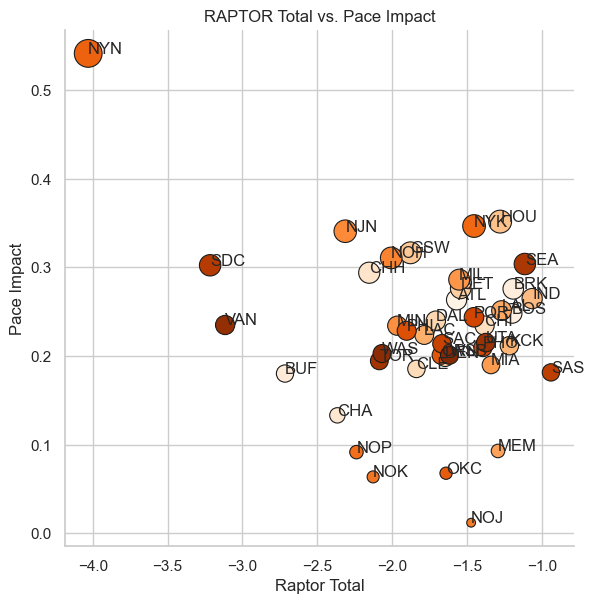

In [41]:
x_axis=avg_summary["Raptor Total"]
y_axis=avg_summary["Pace Impact"]
team_names = avg_summary["team"]

sns.set_theme(style="whitegrid", context="notebook")


sns.relplot(x=x_axis,
              y=y_axis,
              size=y_axis,
              hue=team_names,
              sizes=(40, 400),              
              data=avg_summary,
              height=6,
              edgecolor="k",
              legend=False,
              palette="Oranges"
             )

for team, txt in enumerate(team_names):
    plt.annotate(txt, (x_axis[team], y_axis[team]))
plt.title("RAPTOR Total vs. Pace Impact")
plt.show()

In [66]:
top_ten_raptor_total.head()

,player_name,Total RAPTOR Scores
1811,John Stockton,290.365206
2176,LeBron James,280.151964
586,Chris Paul,239.826136
2460,Michael Jordan,234.114848
2194,Lester Conner,194.700100


#### Pace Impact per Player

In [ ]:
def bar_plot(x_axis,y_axis,ylabel,title,size):
    fig, ax = plt.subplots(figsize=(size))
    bar_container= ax.bar(x_axis,y_axis,alpha=0.5,color="#F94C10")
    ax.bar_label(bar_container,fmt='{:,.0f}')
    plt.xlabel("Player Names",weight="bold")
    plt.ylabel(ylabel,weight="bold")
    plt.title(f"Top 10  {title}",weight="bold")
    plt.xticks(rotation=45)

    plt.show()

In [143]:
def custom_bar(xlabel,ylabel):

    for i in ax.containers:
        ax.bar_label(i,)
    plt.xticks(rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"Top 10 {ylabel}{xlabel}",weight="bold")
    ax.axhline(0,color="k",clip_on=False)
    sns.despine(bottom=True)
    plt.show()

In [149]:
def sorting(col):
    sort_values(by=col,ascending=False)

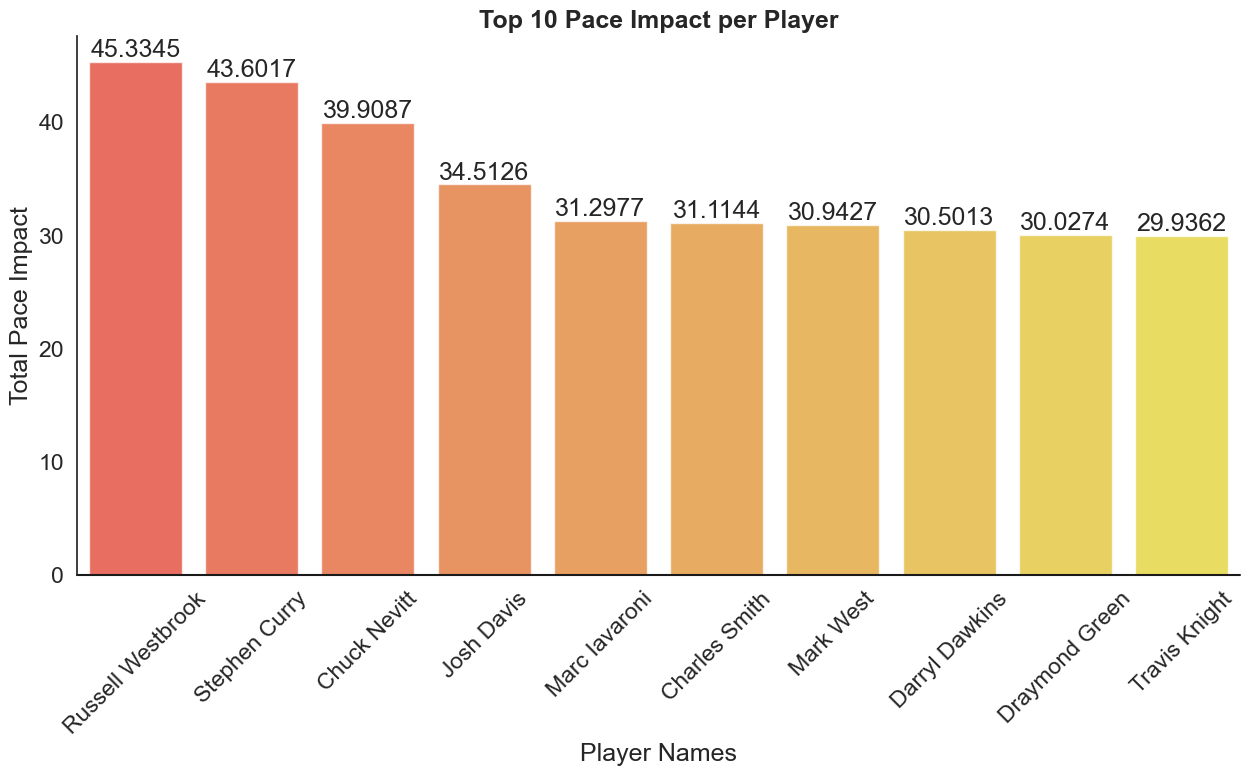

In [134]:
top_pace=total_mp_pace_raptor[["player_name","Total Pace Impact"]].sort_values(by="Total Pace Impact",ascending=False)
top_10_pace=top_pace.head(10)


f, (ax) = plt.subplots(figsize=(15,7))
sns.set_theme(style="white", context="notebook",font_scale=1.5)

sns.barplot(x="player_name",
            y="Total Pace Impact",
            data=top_10_pace,
            palette="autumn",
            alpha=0.7)

for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.xlabel("Player Names")
plt.title("Top 10 Pace Impact per Player",weight="bold")
ax.axhline(0,color="k",clip_on=False)
sns.despine(bottom=True)
plt.show()

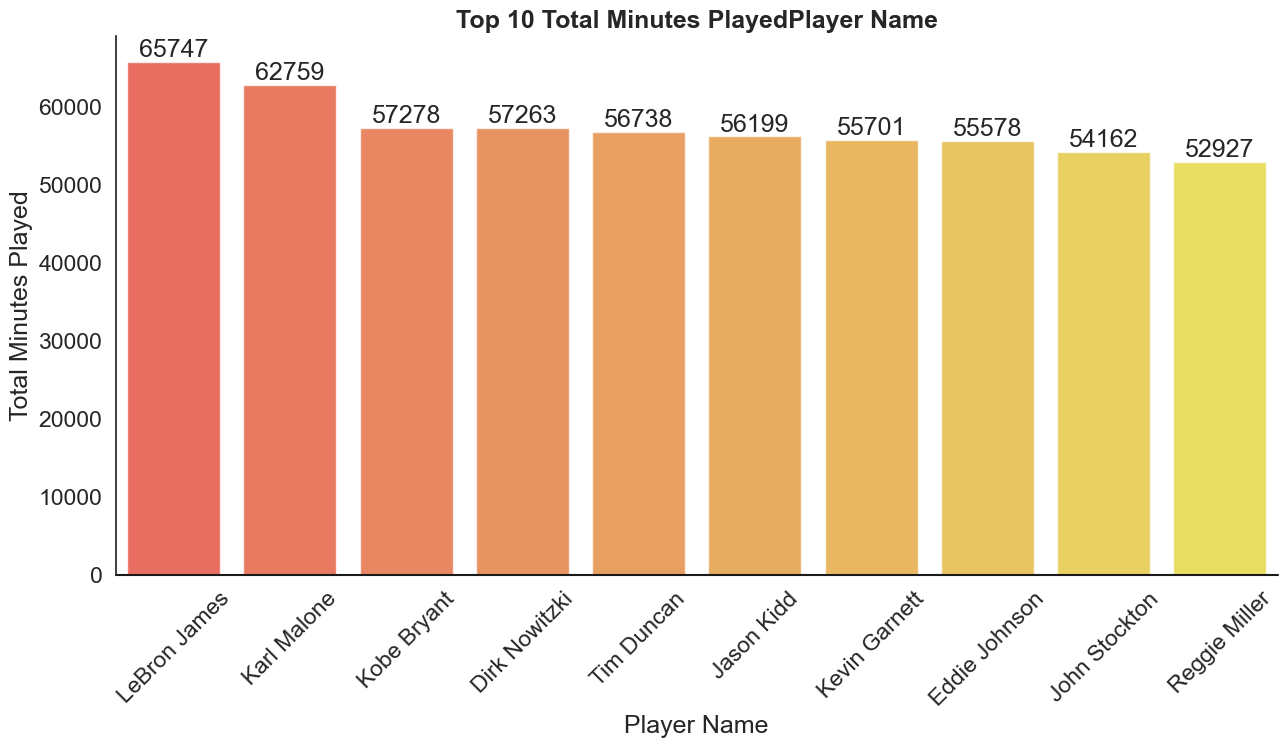

In [144]:
top_mp=total_mp_pace_raptor[["player_name","Total Minutes Played"]].sort_values(by="Total Minutes Played",ascending=False)
top_10_mp=top_mp.head(10)

f, (ax) = plt.subplots(figsize=(15,7))
sns.set_theme(style="white", context="notebook",font_scale=1.5)

sns.barplot(x="player_name",
            y="Total Minutes Played",
            data=top_10_mp,
            palette="autumn",
            alpha=0.7)

custom_bar("Player Name","Total Minutes Played")

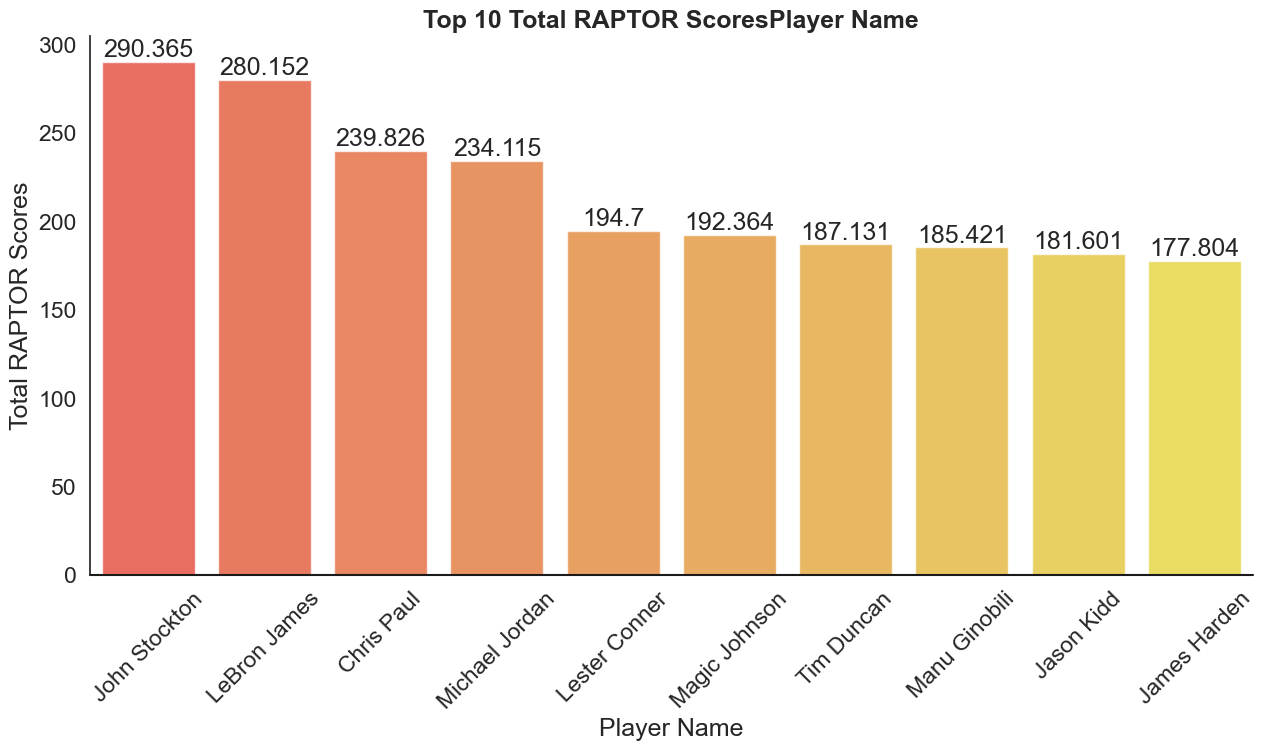

In [156]:
top_10_raptors=total_mp_pace_raptor[["player_name","Total RAPTOR Scores"]].sort_values(by="Total RAPTOR Scores",ascending=False)
top_10_raptors=top_10_raptors.head(10)

f, (ax) = plt.subplots(figsize=(15,7))
sns.set_theme(style="white", context="notebook",font_scale=1.5)

sns.barplot(x="player_name",
            y="Total RAPTOR Scores",
            data=top_10_raptors,
            palette="autumn",
            alpha=0.7)
custom_bar("Player Name","Total RAPTOR Scores")

In [171]:
top_20=total_mp_pace_raptor.sort_values(by="Total Minutes Played",ascending=False)
top_20=top_20.head(20)
top_20

,player_name,Total Minutes Played,Total Pace Impact,Total RAPTOR Scores
2176,LeBron James,65747,-3.999099,280.151964
1947,Karl Malone,62759,-5.570942,94.515798
2089,Kobe Bryant,57278,6.921152,120.162822
970,Dirk Nowitzki,57263,-15.395781,122.126837
3328,Tim Duncan,56738,-28.784702,187.131456
1584,Jason Kidd,56199,-8.445971,181.600623
2038,Kevin Garnett,55701,-20.979523,156.808211
1081,Eddie Johnson,55578,7.078968,-31.844547
1811,John Stockton,54162,-5.250127,290.365206
2876,Reggie Miller,52927,-9.685790,145.870845


<Figure size 1000x1000 with 0 Axes>

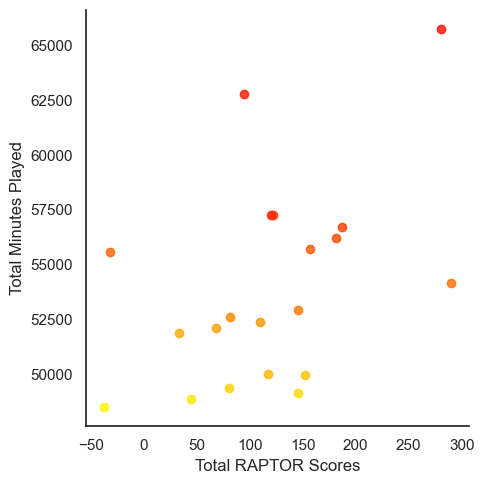

In [180]:
x=top_20["Total RAPTOR Scores"]
y=top_20["Total Minutes Played"]
names=top_20["player_name"]

sns.set_context("notebook")
plt.figure(figsize=(10,10))
sns.lmplot(x="Total RAPTOR Scores",
           y="Total Minutes Played",
           hue="player_name",
           palette="autumn",
           legend=False,
           data=top_20,
           )

# for name, txt in enumerate(names):
#     plt.annotate(txt, (x[name], y[name]))

plt.show()

In [188]:
top_20_pace=total_mp_pace_raptor[["player_name","Total Pace Impact","Total RAPTOR Scores"]].sort_values(by="Total Pace Impact",ascending=False)
top_20_pace=top_20_pace.head(20)


<Figure size 1000x1000 with 0 Axes>

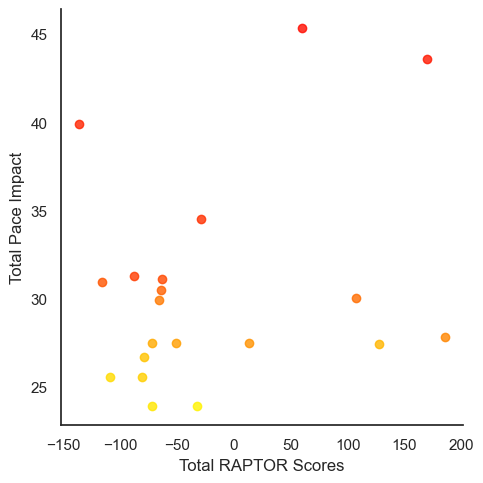

In [186]:
sns.set_context("notebook")
plt.figure(figsize=(10,10))
sns.lmplot(x="Total RAPTOR Scores",
           y="Total Pace Impact",
           hue="player_name",
           palette="autumn",
           legend=False,
           data=top_20_pace,
           )
plt.show()

In [38]:
df_mx=clean_df[['poss',
       'mp', 'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact',
       'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total']].corr()
df_mx

,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
poss,1.000000,0.996874,0.272371,0.093311,0.256361,0.715598,0.733272,-0.108017,0.300446,0.171145,0.305262,-0.206298,0.036166,0.008135,0.030445,0.035764,-0.020865,0.019064
mp,0.996874,1.000000,0.274382,0.095388,0.259031,0.720408,0.737224,-0.103488,0.302599,0.173791,0.308226,-0.209791,0.036599,0.008341,0.030883,0.036183,-0.021030,0.019340
raptor_offense,0.272371,0.274382,1.000000,0.148987,0.832858,0.378710,0.329793,0.256315,0.976704,0.229170,0.813465,-0.294294,0.197612,0.009784,0.142507,0.153429,-0.020566,0.127148
raptor_defense,0.093311,0.095388,0.148987,1.000000,0.671394,0.204019,0.171485,0.171337,0.182270,0.928532,0.636106,-0.020865,0.005689,0.238835,0.168183,-0.012552,0.117101,0.065534
raptor_total,0.256361,0.259031,0.832858,0.671394,1.000000,0.398026,0.343154,0.288002,0.834028,0.691485,0.965714,-0.232242,0.151288,0.141016,0.200941,0.107964,0.050132,0.131975
war_total,0.715598,0.720408,0.378710,0.204019,0.398026,1.000000,0.982671,0.075146,0.417023,0.263941,0.438138,-0.150842,0.049239,0.022866,0.049559,0.036846,0.001337,0.034664
war_reg_season,0.733272,0.737224,0.329793,0.171485,0.343154,0.982671,1.000000,-0.110989,0.364077,0.225205,0.379654,-0.134741,0.042715,0.019307,0.042629,0.031486,0.000606,0.029268
war_playoffs,-0.108017,-0.103488,0.256315,0.171337,0.288002,0.075146,-0.110989,1.000000,0.277298,0.203620,0.306709,-0.083890,0.034207,0.018735,0.036389,0.028170,0.003909,0.028401
predator_offense,0.300446,0.302599,0.976704,0.182270,0.834028,0.417023,0.364077,0.277298,1.000000,0.265584,0.849789,-0.265292,0.182887,0.014074,0.135340,0.141534,-0.024050,0.113949
predator_defense,0.171145,0.173791,0.229170,0.928532,0.691485,0.263941,0.225205,0.203620,0.265584,1.000000,0.733883,0.057046,0.037581,0.236225,0.188300,0.039334,0.057870,0.074140


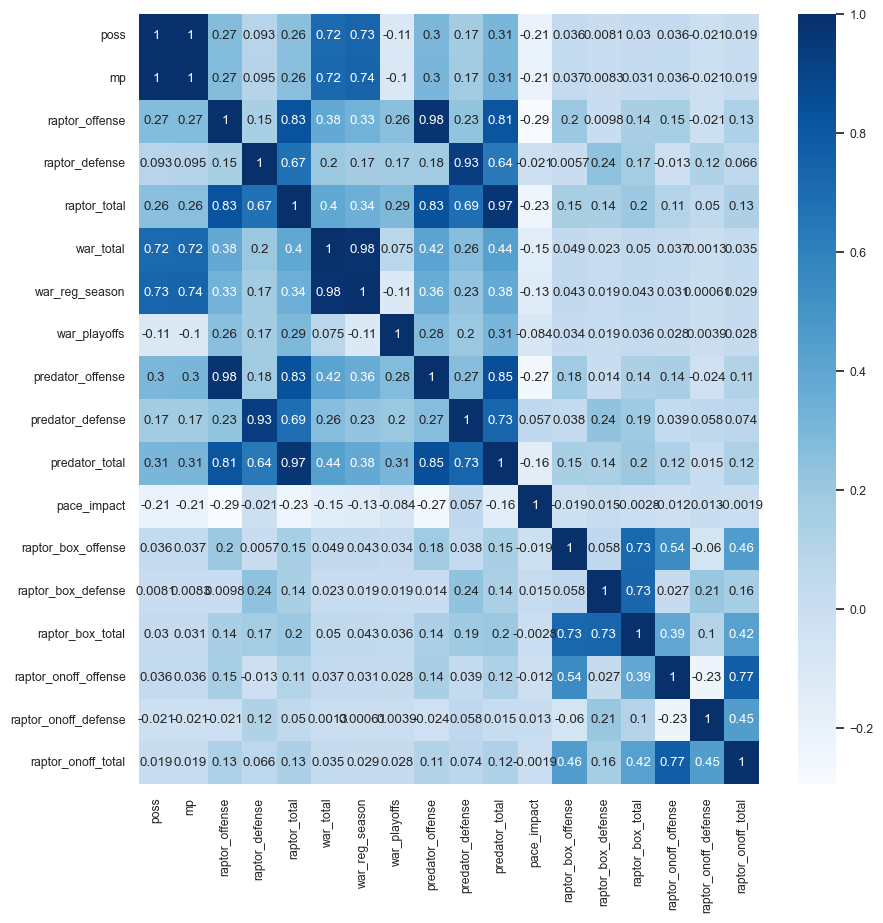

In [25]:
plt.figure(figsize=(10,10))
sns.set_context("notebook",font_scale=0.8)

sns.heatmap(df_mx, annot=True, cmap="Blues")
plt.show()

In [26]:
cluster_plot=clean_df[["season","team","raptor_total"]]
cluster_plot.head()

,season,team,raptor_total
0,1977,LAL,9.639006
1,1977,LAL,7.342679
2,1977,BUF,-2.295249
3,1977,LAL,-0.800928
4,1977,LAL,0.057838


In [27]:
cluster_plot=cluster_plot.pivot_table(index="team",columns="season",values="raptor_total")


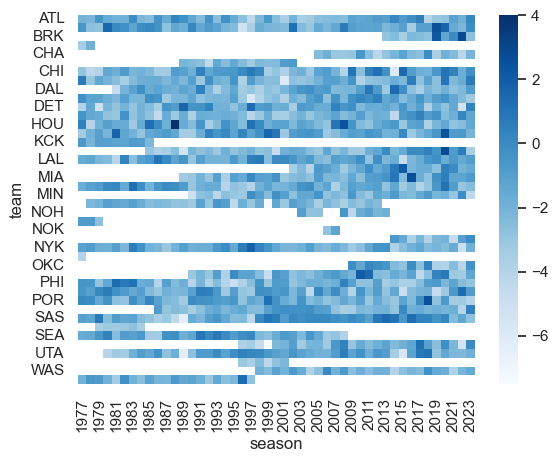

In [28]:
sns.set_context("notebook")
sns.heatmap(cluster_plot, cmap="Blues")
plt.show()

In [61]:
# avg_sum=avg_summary[["team","Raptor Total","Pace Impact","Minutes Played"]]
# avg_sum=avg_sum.head(10)
# avg_sum

In [60]:
# sns.set_context("talk")
#  plt.figure(figsize=(10,10))
# sns.lmplot(x="Raptor Total",
#            y="RAPTOR Offense",
#            hue="team",
#            legend=False,
#            data=avg_summary,
#            scatter_kws={"s":100,"linewidth":0.5,"edgecolor":"w"})

# plt.show()